## Problem Statement

The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.

Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings.

In order to do this, you planned to build a sentiment-based product recommendation system, which includes the following tasks.

Data sourcing and sentiment analysis Building a recommendation system Improving the recommendations using the sentiment analysis model Deploying the end-to-end project with a user interface

In [43]:
#general purpose libraries 
import re
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 300)

In [44]:
# NLTK libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\balaji\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\balaji\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\balaji\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\balaji\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [45]:
#Modelling 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

### Loading the Dataset

In [46]:
# importing dataset
df_reviews = pd.read_csv("dataset\sample30.csv")
df_reviews.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did ...",Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,NaN,NaN,walker557,Negative


### Exploratory Data Analysis

In [47]:
print(np.__version__)

1.16.5


In [48]:
!pip install numpy==1.16.5

In [49]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [50]:
def calcMissingRowCount(df):
    # summing up the missing values (column-wise) and displaying fraction of NaNs
    return df.isnull().sum()

calcMissingRowCount(df_reviews)

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [51]:
# Remove the missing row of user_sentiment
df_reviews = df_reviews[~df_reviews.user_sentiment.isnull()]

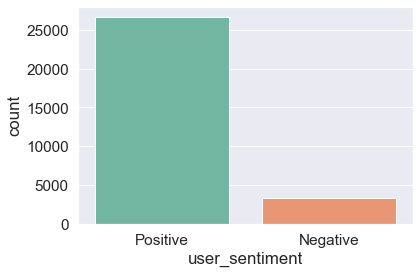

In [52]:
sns.countplot(x='user_sentiment', data= df_reviews, palette="Set2")

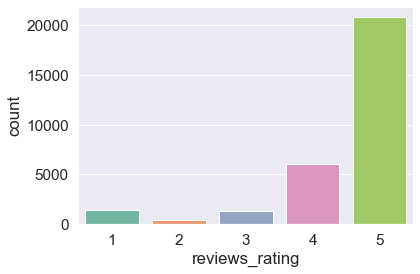

In [53]:
#examine the rating..
sns.countplot(x='reviews_rating', data= df_reviews, palette="Set2")

In [54]:
import string

In [55]:
# Write your function here to clean the text and remove all the unnecessary elements.
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub("\[\s*\w*\s*\]", "", text)
    dictionary = "abc".maketrans('', '', string.punctuation)
    text = text.translate(dictionary)
    text = re.sub("\S*\d\S*", "", text)
    
    return text

df_reviews["reviews_text_cleaned"] = pd.DataFrame(df_reviews.reviews_text.apply(lambda x: clean_text(x)))

In [56]:
df_clean = df_reviews[['reviews_text_cleaned', 'user_sentiment']]

In [57]:
### Need to do lemma....

(array([1.2861e+04, 1.0491e+04, 3.5020e+03, 1.4930e+03, 7.1500e+02,
        3.3700e+02, 2.1400e+02, 1.1900e+02, 8.8000e+01, 4.9000e+01,
        2.9000e+01, 3.6000e+01, 1.6000e+01, 1.0000e+01, 5.0000e+00,
        7.0000e+00, 1.0000e+00, 4.0000e+00, 5.0000e+00, 3.0000e+00,
        3.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([   0.  ,  113.48,  226.96,  340.44,  453.92,  567.4 ,  680.88,
         794.36,  907.84, 1021.32, 1134.8 , 1248.28, 1361.76, 1475.24,
        1588.72, 1702.2 , 1815.68, 1929.16, 2042.64, 2156.12, 2269.6 ,
        2383.08, 2496.56, 2610.04, 2723.52, 2837.  , 2950.48, 3063.96,
        3177.44, 3290.92, 3404.4 ,

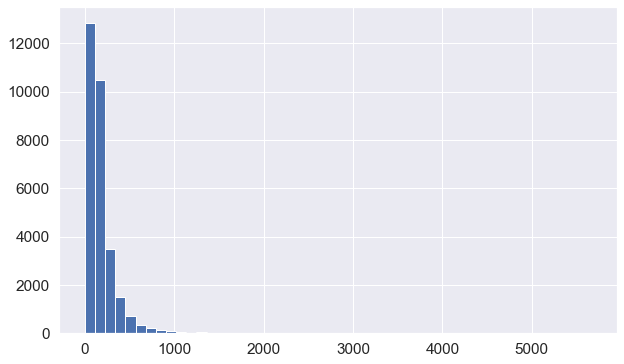

In [58]:
# Write your code here to visualise the data according to the 'Review Text' character length
plt.figure(figsize=(10,6))
reviews_lens = [len(d) for d in df_clean.reviews_text_cleaned]
plt.hist(reviews_lens, bins = 50)

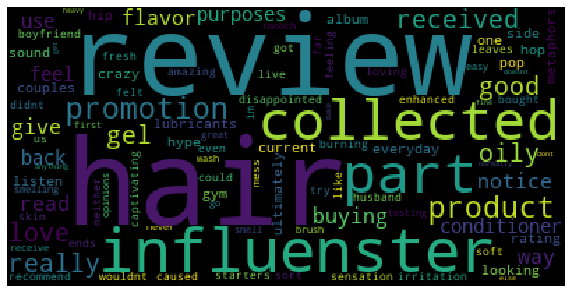

In [59]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud
stoplist = set(stopwords.words("english"))

wordcloud = WordCloud(stopwords=stoplist,max_words=100).generate(str(df_clean.reviews_text_cleaned))

print(wordcloud)
plt.figure(figsize= (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

In [60]:
#Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 
def get_top_n_ngram( corpus, n_gram_range ,n=None):
    vec = CountVectorizer(ngram_range=(n_gram_range, n_gram_range), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    #print(bag_of_words)
    sum_words = bag_of_words.sum(axis=0) 
    print("--1",sum_words)
    for word, idx in vec.vocabulary_.items():
        #print(word)
        #print(idx)
        break
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    #print("-31",words_freq)
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [61]:
#Print the top 10 words in the unigram frequency
common_words = get_top_n_ngram(df_clean.reviews_text_cleaned, 1, 10)
pd.DataFrame(common_words)

--1 [[1 1 1 ... 1 1 2]]


,0,1
0,review,9113
1,great,8865
2,promotion,8747
3,collected,8745
4,love,8347
5,use,7945
6,product,7670
7,movie,6232
8,wipes,5204
9,clean,4822


--1 [[1 1 1 ... 1 1 2]]


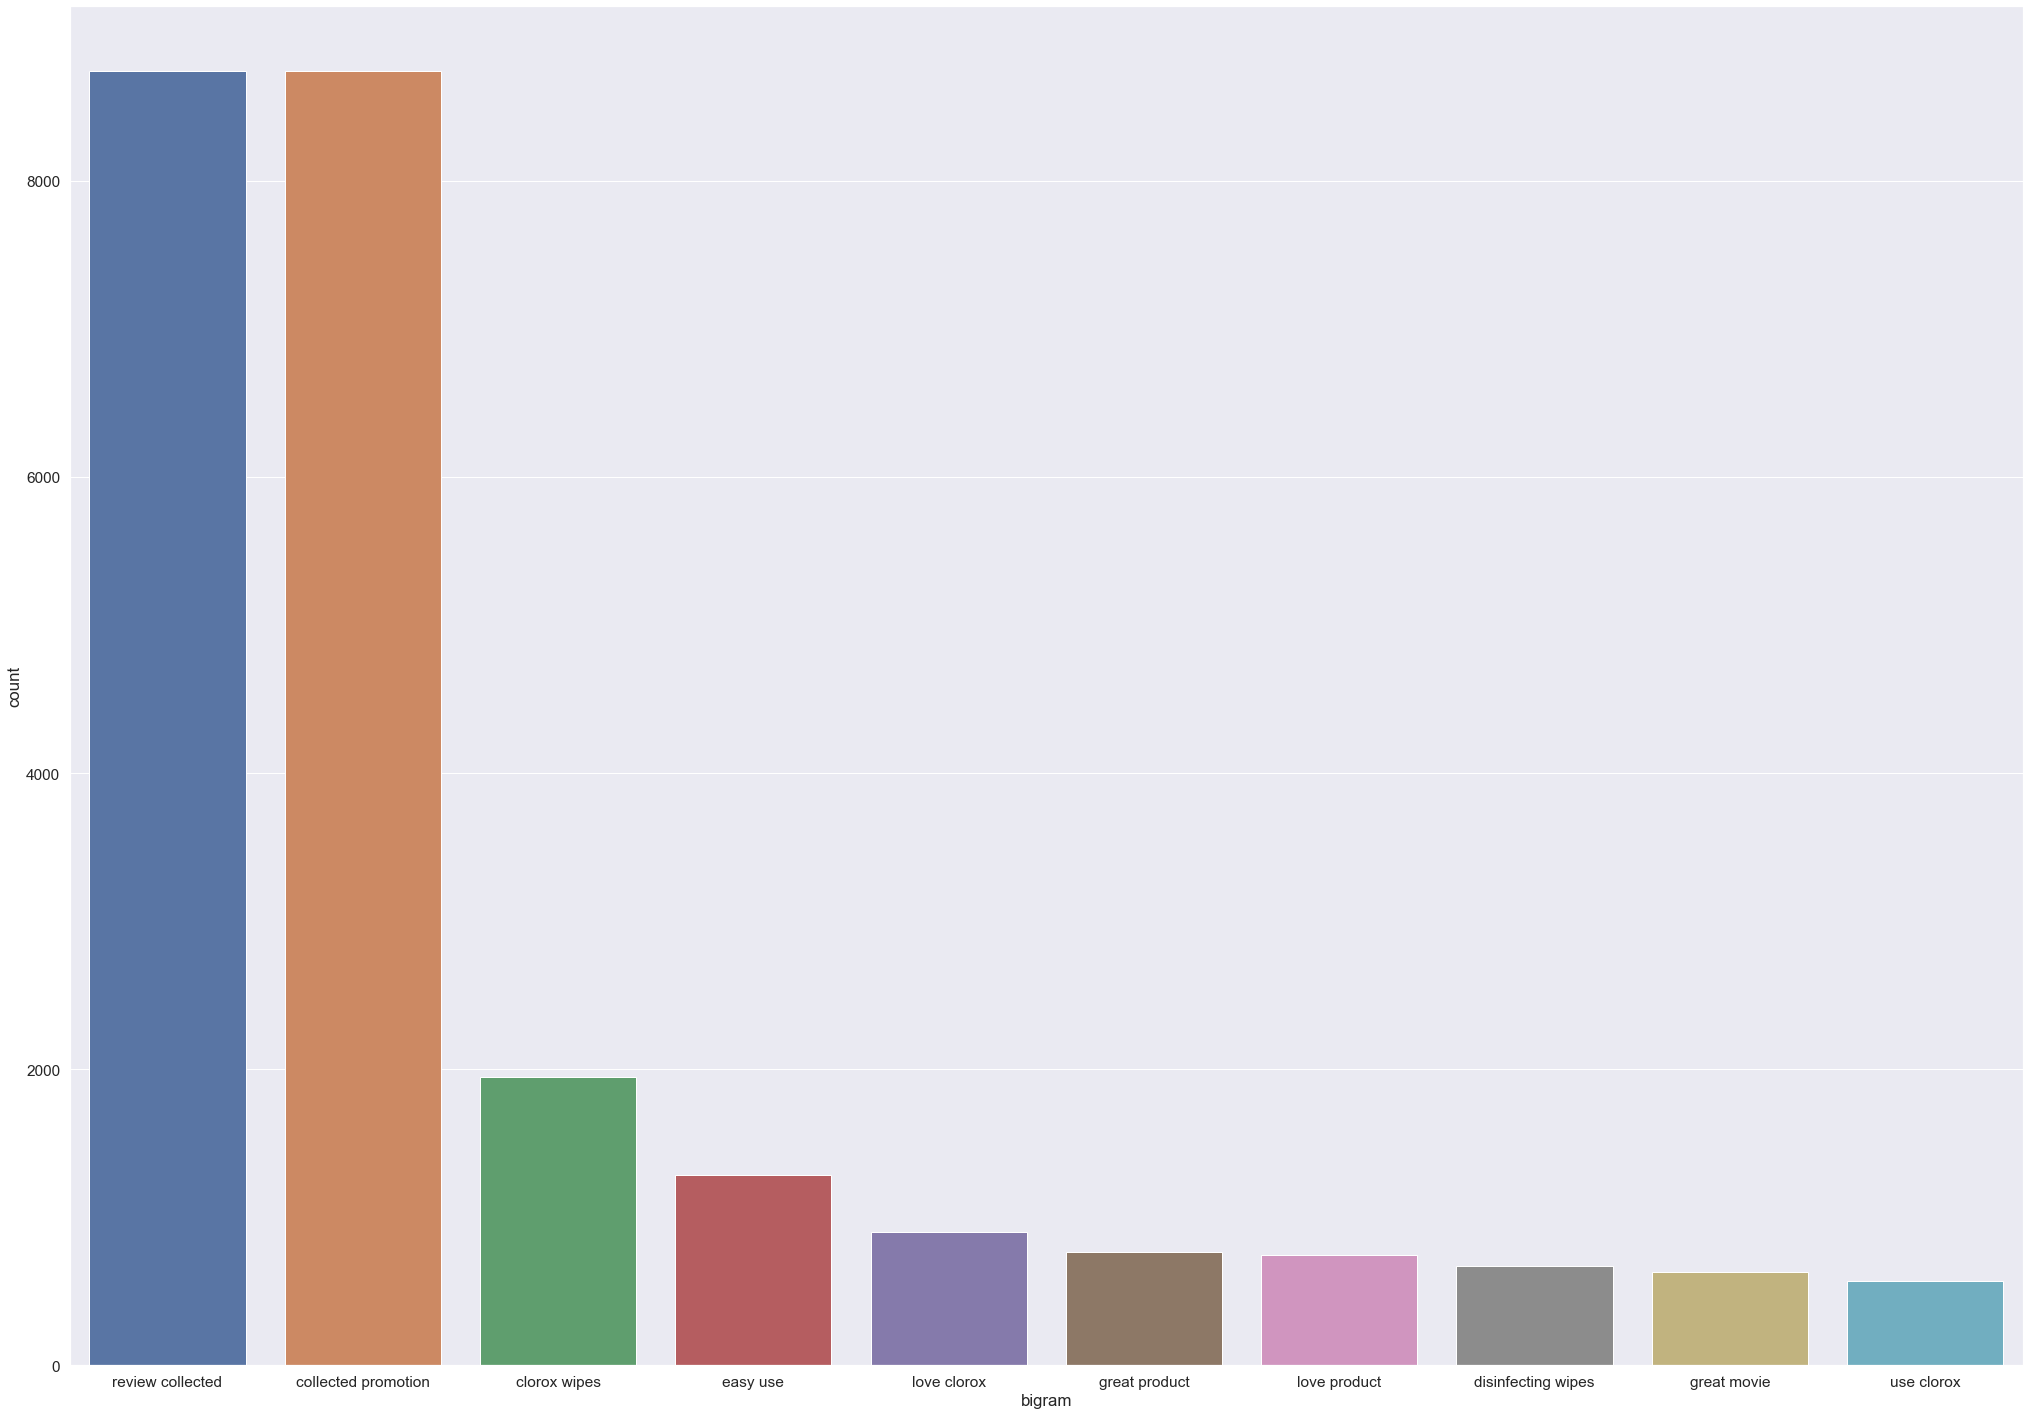

In [62]:
#Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean). 
common_words = get_top_n_ngram(df_clean.reviews_text_cleaned, 2, 10)
df3 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])
plt.figure(figsize=[35,25])
fig = sns.barplot(x=df3['bigram'], y=df3['count'])

In [63]:
X = df_clean['reviews_text_cleaned']
y = df_clean['user_sentiment']

### Feature Extraction

In [64]:
no_of_classes= len(pd.Series(y).value_counts())

In [65]:
#Distribution of the target variable data in terms of proportions.
for i in range(0,no_of_classes):
    print("Percent of {0}s: ".format(i), round(100*pd.Series(y).value_counts()[i]/pd.Series(y).value_counts().sum(),2), "%")

Percent of 0s:  88.78 %
Percent of 1s:  11.22 %


In [66]:
df_clean['user_sentiment'] = df_clean['user_sentiment'].map({'Positive':1,'Negative':0})

In [67]:
from sklearn.feature_extraction.text import TfidfTransformer

In [68]:
# Split the dataset into test and train
seed = 50 

#Write your code to get the Vector count
count_vect = CountVectorizer()
X = count_vect.fit_transform(df_clean['reviews_text_cleaned'])

#Write your code here to transform the word vector to tf-idf
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X)

y= df_clean['user_sentiment']

In [69]:
# splitting into test and train
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, y, random_state=1)

### Modelling

In [70]:
import time
from sklearn import metrics
import pickle

In [71]:
def evaluate_model(y, y_pred):
    
    result_metrics = [] 
    def evaluate_scores(y, y_pred):
        accuracy = metrics.accuracy_score(y, y_pred)
        precision = metrics.precision_score(y_test, y_pred_class)
        recall = metrics.recall_score(y_test, y_pred_class)
        f1score = metrics.f1_score(y_test, y_pred_class)
        print("ACCURACY SCORE :", accuracy)
        print("PRECISION SCORE :", precision)
        print("RECALL SCORE :", recall)
        print("F1 SCORE :",f1score)
        result_metrics.append(accuracy)
        result_metrics.append(precision)
        result_metrics.append(recall)
        result_metrics.append(f1score)
       
    def confusion_matrix(y, y_pred):
        confusion = metrics.confusion_matrix(y_test, y_pred_class)
        #print(confusion)
        
        def plot_confusion_matrix(data, labels):
            sns.set(color_codes=True)
            plt.figure(1, figsize=(15, 9))
            plt.title("Confusion Matrix")
 
            sns.set(font_scale=1.4)
            ax = sns.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'}, fmt="")
 
            ax.set_xticklabels(labels)
            ax.set_yticklabels(labels)
 
            ax.set(ylabel="True Label", xlabel="Predicted Label")
            plt.show()
        
        # define labels
        labels = [0,1,2,3,4]
        plot_confusion_matrix(confusion,labels)
    
    evaluate_scores(y, y_pred)
    confusion_matrix(y, y_pred)
    return result_metrics

In [72]:
def train_predict_model(model, model_name, x_train, y_train, x_test):
    model.fit(x_train,y_train)
    filename = "model\\"+model_name+'.pkl'
    pickle.dump(model, open(filename, 'wb'))
    return model.predict(x_test)

In [73]:
# Build the Logistic Regression model.
%time
logreg = LogisticRegression()
y_pred_class = train_predict_model(logreg,'LogisticRegression',X_train, y_train,X_test)

Wall time: 0 ns


ACCURACY SCORE : 0.9184
PRECISION SCORE : 0.9186576439718271
RECALL SCORE : 0.9965543071161048
F1 SCORE : 0.9560218453578615


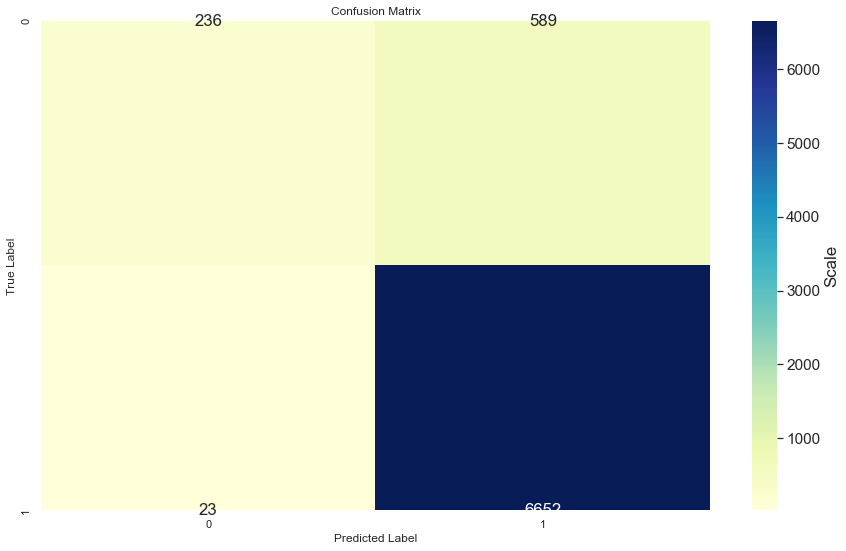

In [74]:
# Prediction Test Data
lr_metrics  = evaluate_model(y_test, y_pred_class)

### Class imbalance (using SMOTE)

In [75]:
counter = Counter(y_train)
print('Before',counter)

sm = SMOTE()

# transform the dataset
X_train, y_train = sm.fit_resample(X_train, y_train)

counter = Counter(y_train)
print('After',counter)

Before Counter({1: 19957, 0: 2542})
After Counter({1: 19957, 0: 19957})


In [76]:
# Build the Logistic Regression model.
%time
logit = LogisticRegression()
y_pred_class = train_predict_model(logreg,'LogisticRegression',X_train, y_train,X_test)

Wall time: 0 ns


ACCURACY SCORE : 0.9270666666666667
PRECISION SCORE : 0.9880535202293724
RECALL SCORE : 0.9292883895131087
F1 SCORE : 0.9577704006793794


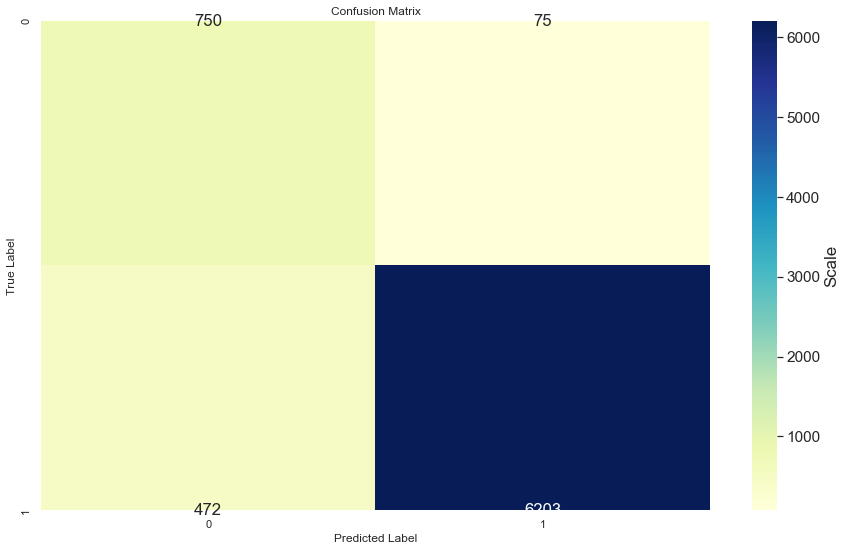

In [77]:
lr_metrics  = evaluate_model(y_test, y_pred_class)

### Naive Bayes 

In [78]:
# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB

In [79]:
mnb = MultinomialNB()

y_pred_class = train_predict_model(mnb,'NaiveBayes',X_train, y_train,X_test)

ACCURACY SCORE : 0.8662666666666666
PRECISION SCORE : 0.956977118917177
RECALL SCORE : 0.8897378277153558
F1 SCORE : 0.9221333747379862


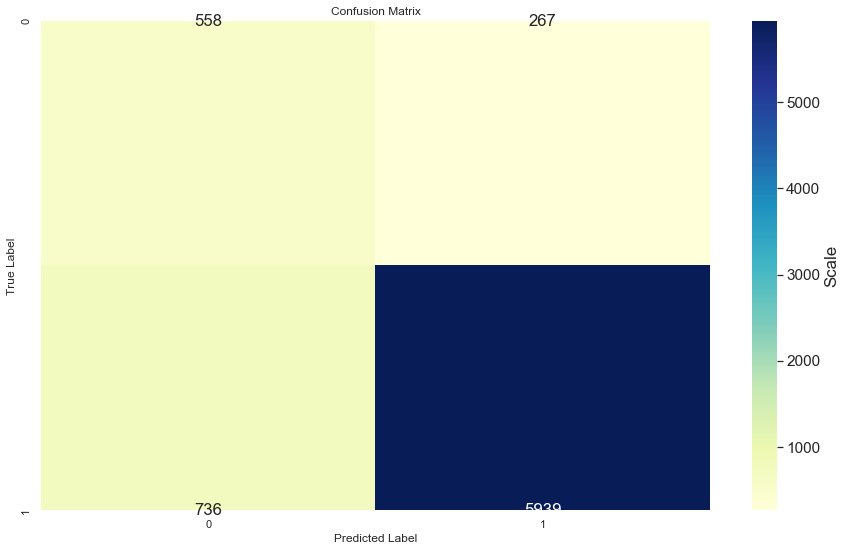

In [80]:
nb_metrics = evaluate_model(y_test, y_pred_class)

### Decision Tree

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [82]:
dt = DecisionTreeClassifier(random_state=42)

In [83]:
params = {
    "max_depth": [2,3,5,10],
    "min_samples_leaf": [5,10,20,50]
}

In [84]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [85]:
%time
grid_search.fit(X_train, y_train)

Wall time: 0 ns
Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:   13.5s finished


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [5, 10, 20, 50]},
             scoring='accuracy', verbose=1)

In [86]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [87]:
y_pred_class = dt_best.predict(X_test)

ACCURACY SCORE : 0.7808
PRECISION SCORE : 0.9844020797227037
RECALL SCORE : 0.7658426966292134
F1 SCORE : 0.8614762386248735


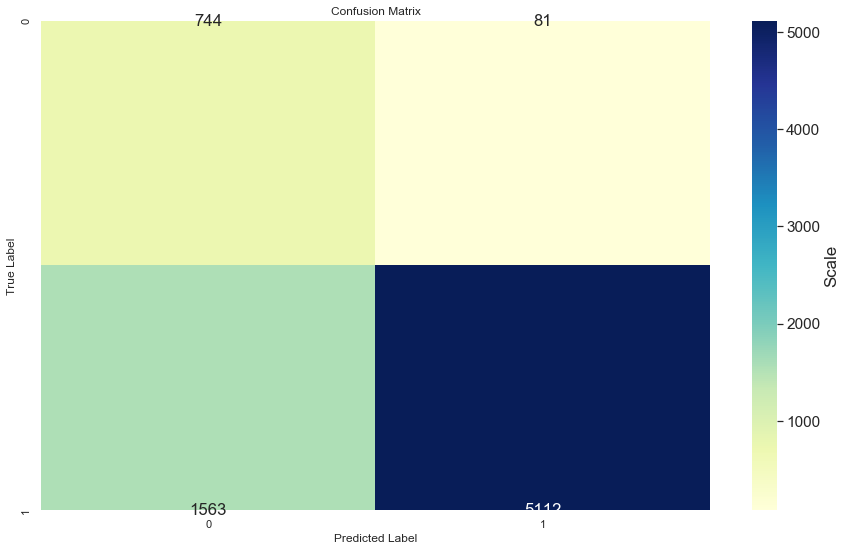

In [88]:
dt_metrics_cv = evaluate_model(y_test, y_pred_class)

### Random Forrest

In [89]:
rf = RandomForestClassifier(oob_score=True)

In [90]:
params = {
    'max_depth': [2,3,5,10],
    'min_samples_leaf': [5,10,20,50],
    'n_estimators': [10, 25, 50, 100]
}

In [91]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [92]:
%time
grid_search.fit(X_train, y_train)

Wall time: 0 ns
Fitting 4 folds for each of 64 candidates, totalling 256 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:  1.3min finished


GridSearchCV(cv=4, estimator=RandomForestClassifier(oob_score=True), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [93]:
grid_search.best_score_

0.8689194893963633

ACCURACY SCORE : 0.8516
PRECISION SCORE : 0.9431166347992351
RECALL SCORE : 0.8867415730337078
F1 SCORE : 0.9140606902941857


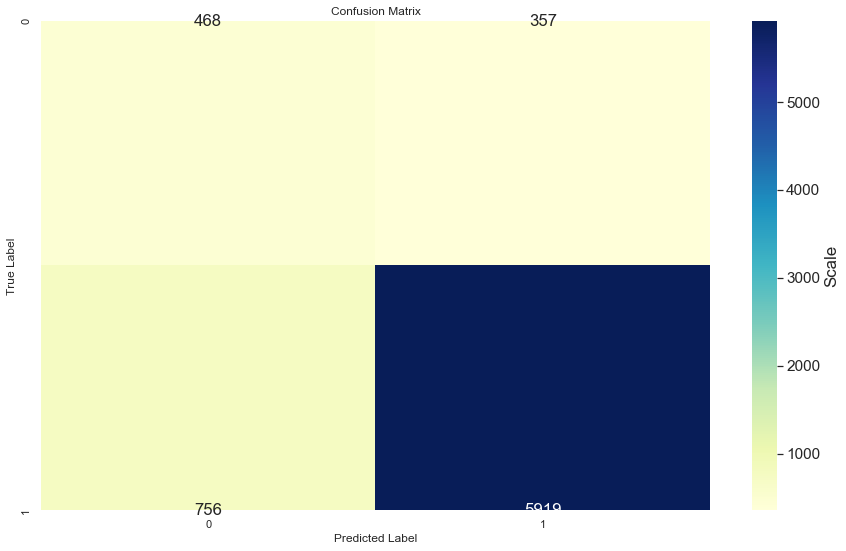

In [94]:
rf_best = grid_search.best_estimator_
y_pred_class = rf_best.predict(X_test)
rf_metrics = evaluate_model(y_test, y_pred_class)

### XGBoost Classifier

In [95]:
import xgboost as xgb

In [96]:
xgclf = xgb.XGBClassifier()
xgclf.fit(X_train, y_train)

[18:25:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

ACCURACY SCORE : 0.9398666666666666
PRECISION SCORE : 0.9826302729528535
RECALL SCORE : 0.9492134831460675
F1 SCORE : 0.9656328583403184


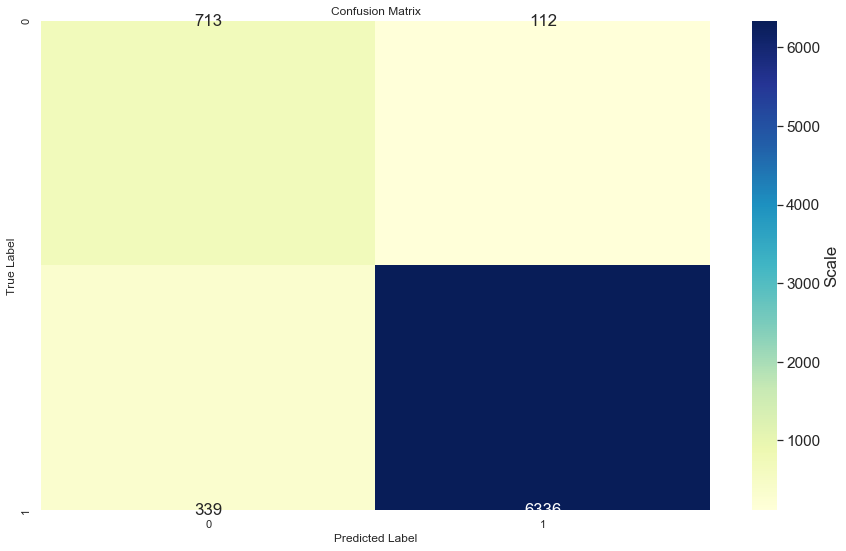

In [97]:
y_pred_class = xgclf.predict(X_test)
xg_metrics = evaluate_model(y_test, y_pred_class)

### Model Inference

In [98]:
# Creating a table which contain all the metrics

metrics_table = {'Metric': ['Accuracy','Precision','Recall',
                       'F1Score'], 
        'Logistic Regression': lr_metrics,
        'Naive Bayes': nb_metrics,
        'Decision Tree': dt_metrics_cv,
         'Random Forrest': rf_metrics,
        'XG Boost': xg_metrics
        }

df_metrics = pd.DataFrame(metrics_table ,columns = ['Metric', 'Logistic Regression', 'Naive Bayes','Decision Tree','Random Forrest',
                                                    'XG Boost'] )

df_metrics


,Metric,Logistic Regression,Naive Bayes,Decision Tree,Random Forrest,XG Boost
0,Accuracy,0.927067,0.866267,0.780800,0.851600,0.939867
1,Precision,0.988054,0.956977,0.984402,0.943117,0.982630
2,Recall,0.929288,0.889738,0.765843,0.886742,0.949213
3,F1Score,0.957770,0.922133,0.861476,0.914061,0.965633
